#

# Analizando datos de accidentes vehiculares: Conductores a la fuga

![Conductor Fugado](https://www.segurojoven.com/imagenes-web/uploads/Blogconductor-fugado.jpg)

Mediante datos del INEGI sobre accidentes vehiculares entre 1997 y el 2004, podemos realizar un análisis para obtener detalles sobre los conductores que se dan a la fuga luego de un accidente vehicular.

Esto es importante porque ____

In [ ]:
#Carga de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import numpy as np


In [10]:

# URL de exportación a CSV
url = 'https://docs.google.com/spreadsheets/d/1t2N9E8hg7y3Kpi6fyFwkmLbzLFHs03Uu/export?format=csv'

# Leer directamente el contenido como DataFrame
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()


,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2015,Enero,20,40,27,Martes,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas
1,Municipal,1,1,2015,Enero,0,0,1,Jueves,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas
2,Municipal,1,1,2015,Enero,17,0,28,Miércoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras definitivas
3,Municipal,1,1,2015,Enero,8,40,1,Jueves,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas
4,Municipal,1,1,2015,Enero,23,40,30,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180066 entries, 0 to 180065
Data columns (total 45 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   COBERTURA     180066 non-null  object
 1   ID_ENTIDAD    180066 non-null  int64 
 2   ID_MUNICIPIO  180066 non-null  int64 
 3   ANIO          180066 non-null  int64 
 4   MES           180066 non-null  object
 5   ID_HORA       180066 non-null  int64 
 6   ID_MINUTO     180066 non-null  int64 
 7   ID_DIA        180066 non-null  int64 
 8   DIASEMANA     180066 non-null  object
 9   URBANA        180066 non-null  object
 10  SUBURBANA     180066 non-null  object
 11  TIPACCID      180066 non-null  object
 12  AUTOMOVIL     180066 non-null  int64 
 13  CAMPASAJ      180066 non-null  int64 
 14  MICROBUS      180066 non-null  int64 
 15  PASCAMION     180066 non-null  int64 
 16  OMNIBUS       180066 non-null  int64 
 17  TRANVIA       180066 non-null  int64 
 18  CAMIONETA     180066 non

##  1. Carga de datos

Se lee el conjunto de datos desde Google Sheets o desde Drive (ya debe estar cargado en `df`).  
Filtramos únicamente los casos donde `SEXO == 'Se fugó'` para concentrarnos en los accidentes con fuga.


In [12]:
# Cálculo de cada valor posible en la columna SEXO
(df['SEXO'].value_counts())

SEXO
Hombre     139417
Mujer       26406
Se fugó     14243
Name: count, dtype: int64

Aproximadamente el 7.9% (14243 personas) se **fugaron** del accidente, mientras que el 77% (139417 personas) fueron **hombres** y el 14.6% (26406 personas) fueron **mujeres**.


Se crea el dataframe 'fugados' para enfocarnos en las personas que se dieron a la fuga:

In [13]:
fugados = df[df['SEXO']=='Se fugó']
fugados.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
2,Municipal,1,1,2015,Enero,17,0,28,Miércoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras definitivas
6,Municipal,1,1,2015,Enero,0,50,25,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas
15,Municipal,1,1,2015,Enero,19,45,13,Martes,Accidente en no intersección,...,0,1,0,0,0,0,0,0,No fatal,Cifras definitivas
31,Municipal,1,1,2015,Enero,2,50,19,Lunes,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas
34,Municipal,1,1,2015,Enero,3,8,9,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas


##  2. Preparación de datos

Se crean columnas derivadas para análisis:
- **FECHA:** combina `ANIO`, `MES`, `ID_DIA`
- **CLAS_ACCIDENTE:** normaliza la severidad
- **TIPO_VEHICULO:** se identifica el tipo principal de vehículo involucrado  
Además, se ordenan los meses cronológicamente para facilitar gráficas temporales.


In [14]:
# Convertir texto de meses a números
meses = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}
fugados['MES_NUM'] = fugados['MES'].map(meses)
fugados['FECHA'] = pd.to_datetime(dict(year=fugados['ANIO'], month=fugados['MES_NUM'], day=fugados['ID_DIA']), errors='coerce')

# Normalizar severidad
map_clas = {'Sólo Daños': 'Daños', 'No Fatal': 'No Fatal', 'Fatal': 'Fatal'}
fugados['CLAS_ACCIDENTE'] = fugados['CLASACC'].map(map_clas).fillna(fugados['CLASACC'])

# Identificar tipo de vehículo
veh_cols = ['AUTOMOVIL','CAMPASAJ','MICROBUS','PASCAMION','OMNIBUS','TRANVIA',
            'CAMIONETA','CAMION','TRACTOR','FERROCARRI','MOTOCICLET','BICICLETA','OTROVEHIC']

for c in veh_cols:
    if c not in fugados.columns:
        fugados[c] = 0

veh_label = {'AUTOMOVIL':'Automóvil','CAMPASAJ':'Camión de Pasajeros','MICROBUS':'Microbús',
             'PASCAMION':'Pasajero en Camión','OMNIBUS':'Ómnibus','TRANVIA':'Tranvía',
             'CAMIONETA':'Camioneta','CAMION':'Camión','TRACTOR':'Tractor',
             'FERROCARRI':'Ferrocarril','MOTOCICLET':'Motocicleta','BICICLETA':'Bicicleta',
             'OTROVEHIC':'Otro Vehículo'}

def pick_vehicle(row):
    for c in veh_cols:
        if pd.notna(row[c]) and int(row[c]) == 1:
            return veh_label[c]
    return 'Desconocido'

fugados['TIPO_VEHICULO'] = fugados[veh_cols].apply(pick_vehicle, axis=1)

# Ordenar meses
meses_orden = list(meses.keys())
fugados['MES'] = pd.Categorical(fugados['MES'], categories=meses_orden, ordered=True)

# Crear versión simplificada
cols_keep = ['FECHA','MES','ANIO','ID_MUNICIPIO','TIPACCID','CLASACC','CLAS_ACCIDENTE','URBANA','SUBURBANA','TIPO_VEHICULO']
fugados_simplificado = fugados[cols_keep].copy()


C:\Users\Jesus\AppData\Local\Temp\ipykernel_4280\1993205884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fugados['MES_NUM'] = fugados['MES'].map(meses)
C:\Users\Jesus\AppData\Local\Temp\ipykernel_4280\1993205884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fugados['FECHA'] = pd.to_datetime(dict(year=fugados['ANIO'], month=fugados['MES_NUM'], day=fugados['ID_DIA']), errors='coerce')
C:\Users\Jesus\AppData\Local\Temp\ipykernel_4280\1993205884.py:11: SettingWithCopyWarning: 
A value is trying to 

In [15]:
# ⚙️ Subconjunto filtrado (sin Automóvil ni Desconocido)
veh_excluir = ['Automóvil', 'Desconocido']
fug_filtrado = fugados_simplificado[~fugados_simplificado['TIPO_VEHICULO'].isin(veh_excluir)].copy()

# Por si aún no está, asegurar YM (año-mes) para series temporales
if 'YM' not in fug_filtrado.columns:
    fug_filtrado['YM'] = fug_filtrado['FECHA'].dt.to_period('M')

# Asegurar que MES esté ordenado (si ya lo tenías, no hace falta)
meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
if 'MES' in fug_filtrado.columns:
    fug_filtrado['MES'] = pd.Categorical(fug_filtrado['MES'], categories=meses, ordered=True)


## 3. ¿Quiénes se fugan? — Tipo de vehículo

Esta gráfica muestra la **distribución porcentual** de los vehículos involucrados en accidentes con fuga.  
Nos ayudará a identificar qué tipo de vehículo protagoniza más incidentes de este tipo.


C:\Users\Jesus\AppData\Local\Temp\ipykernel_4280\1607186607.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=share.index, y=share.values, palette='crest')


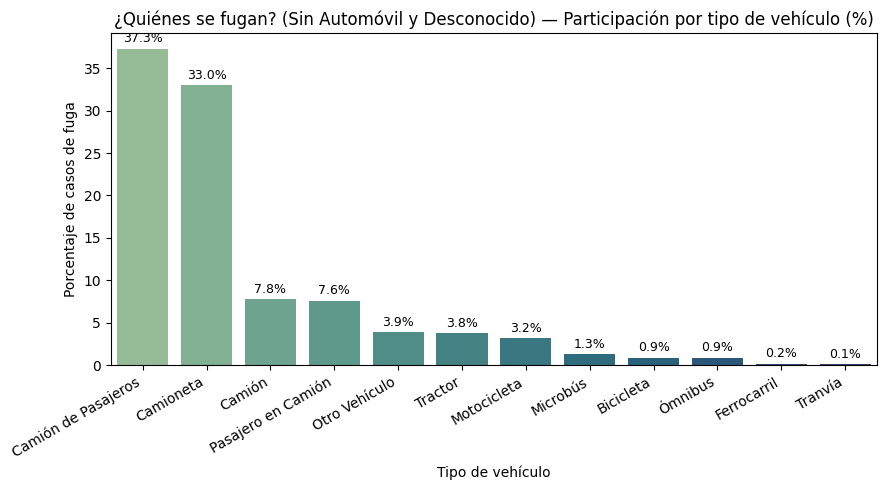

In [16]:
plt.figure(figsize=(9,5))
share = fug_filtrado['TIPO_VEHICULO'].value_counts(normalize=True).mul(100).round(1)
share = share.sort_values(ascending=False)

ax = sns.barplot(x=share.index, y=share.values, palette='crest')
plt.title('¿Quiénes se fugan? (Sin Automóvil y Desconocido) — Participación por tipo de vehículo (%)')
plt.ylabel('Porcentaje de casos de fuga')
plt.xlabel('Tipo de vehículo')
plt.xticks(rotation=30, ha='right')

for i, v in enumerate(share.values):
    ax.text(i, v + 0.4, f'{v}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 4. Evolución mensual de fugas (Top 4 vehículos)

Esta gráfica muestra la **tendencia temporal** de los accidentes con fuga para los cuatro tipos de vehículos más frecuentes.  
Permite detectar meses con mayor incidencia o variaciones estacionales.


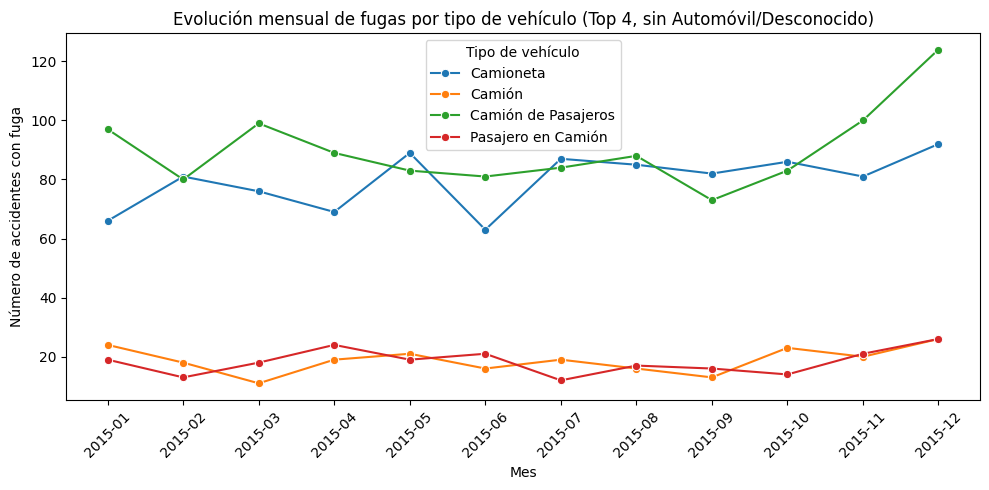

In [17]:
# Top 4 dentro del subconjunto filtrado
top4 = fug_filtrado['TIPO_VEHICULO'].value_counts().head(4).index.tolist()

trend = (fug_filtrado[fug_filtrado['TIPO_VEHICULO'].isin(top4)]
         .groupby(['YM','TIPO_VEHICULO'])
         .size()
         .reset_index(name='conteo'))
trend['YM'] = trend['YM'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x='YM', y='conteo', hue='TIPO_VEHICULO', marker='o')
plt.title('Evolución mensual de fugas por tipo de vehículo (Top 4, sin Automóvil/Desconocido)')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes con fuga')
plt.xticks(rotation=45)
plt.legend(title='Tipo de vehículo')
plt.tight_layout()
plt.show()


## 5. Severidad por tipo de vehículo

Se compara la **gravedad de los accidentes** (fatal, no fatal o daños materiales) entre los distintos tipos de vehículo involucrados en fugas.  
Esto permite observar si ciertos vehículos presentan una mayor proporción de accidentes fatales.


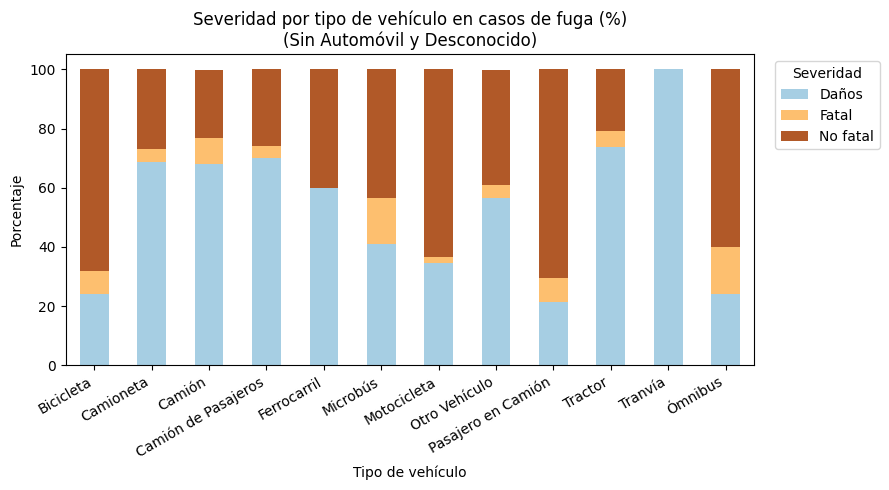

In [18]:
tab = pd.crosstab(fug_filtrado['TIPO_VEHICULO'], fug_filtrado['CLAS_ACCIDENTE'])
tab_pct = tab.div(tab.sum(axis=1), axis=0).mul(100).round(1)

ax = tab_pct.plot(kind='bar', stacked=True, figsize=(9,5), colormap='Paired')
plt.title('Severidad por tipo de vehículo en casos de fuga (%)\n(Sin Automóvil y Desconocido)')
plt.ylabel('Porcentaje')
plt.xlabel('Tipo de vehículo')
plt.legend(title='Severidad', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

##6. Mapa de calor Mes × Tipo de vehículo

Este **heatmap** combina el tipo de vehículo y el mes del año, mostrando dónde se concentran los accidentes con fuga.  
Las celdas más oscuras indican mayor número de casos.


C:\Users\Jesus\AppData\Local\Temp\ipykernel_4280\377632629.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['MES','TIPO_VEHICULO'])


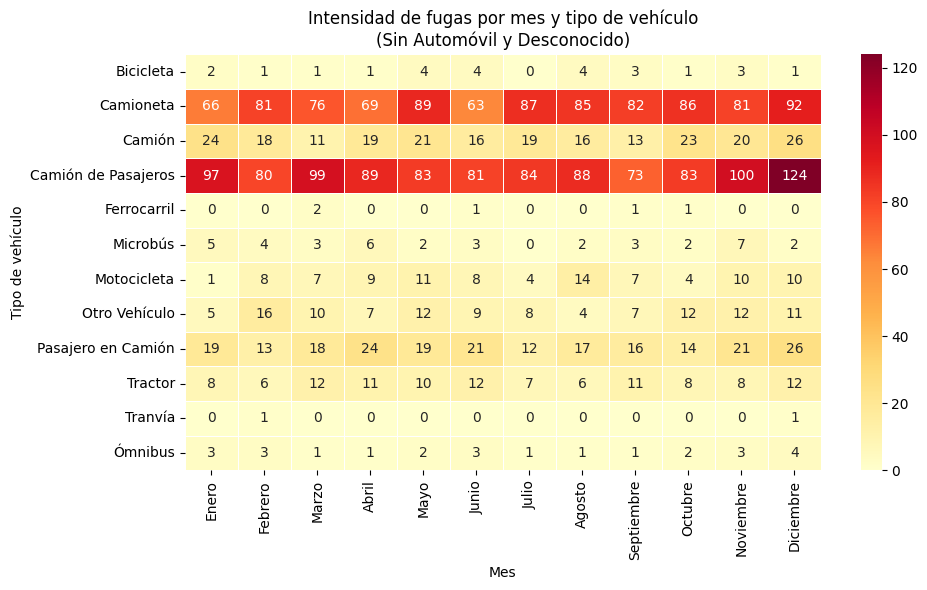

In [19]:
pivot = (fug_filtrado
         .groupby(['MES','TIPO_VEHICULO'])
         .size()
         .reset_index(name='conteo'))

heat = pivot.pivot(index='TIPO_VEHICULO', columns='MES', values='conteo').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(heat, annot=True, fmt='.0f', linewidths=.5, cmap='YlOrRd')
plt.title('Intensidad de fugas por mes y tipo de vehículo\n(Sin Automóvil y Desconocido)')
plt.xlabel('Mes')
plt.ylabel('Tipo de vehículo')
plt.tight_layout()
plt.show()


## 7. Municipios con más fugas

Finalmente, se listan los **10 municipios** con mayor número de accidentes con fuga, desglosados por tipo de vehículo.  
Esto permite ver si hay patrones locales o predominio de ciertos vehículos en determinadas zonas.


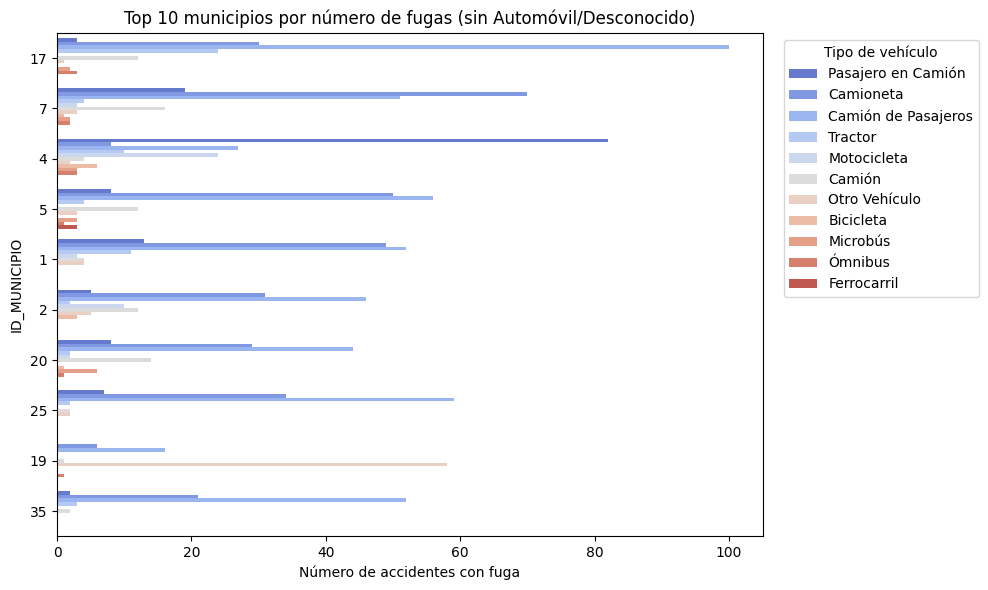

In [20]:
top10_mpos = fug_filtrado['ID_MUNICIPIO'].value_counts().head(10).index.tolist()
sub = fug_filtrado[fug_filtrado['ID_MUNICIPIO'].isin(top10_mpos)].copy()

plt.figure(figsize=(10,6))
sns.countplot(
    data=sub,
    y='ID_MUNICIPIO',
    hue='TIPO_VEHICULO',
    order=top10_mpos,
    palette='coolwarm'
)
plt.title('Top 10 municipios por número de fugas (sin Automóvil/Desconocido)')
plt.xlabel('Número de accidentes con fuga')
plt.ylabel('ID_MUNICIPIO')
plt.legend(title='Tipo de vehículo', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
fugados_simplificado['CLASACC'].value_counts()

CLASACC
Sólo Daños    10513
No fatal       3351
Fatal           379
Name: count, dtype: int64

In [22]:
# Porcentajes
fugados_simplificado['CLASACC'].value_counts(normalize=True) * 100

CLASACC
Sólo Daños    73.811697
No fatal      23.527347
Fatal          2.660956
Name: proportion, dtype: float64

In [23]:
fugados_simplificado['TIPO_VEHICULO'].value_counts()


TIPO_VEHICULO
Automóvil              7086
Desconocido            4260
Camión de Pasajeros    1081
Camioneta               957
Camión                  226
Pasajero en Camión      220
Otro Vehículo           113
Tractor                 111
Motocicleta              93
Microbús                 39
Bicicleta                25
Ómnibus                  25
Ferrocarril               5
Tranvía                   2
Name: count, dtype: int64

In [24]:
fugados_simplificado.groupby('ID_MUNICIPIO').size().sort_values(ascending=False).head(10)


ID_MUNICIPIO
4     1102
17     910
7      894
5      885
2      720
21     697
1      616
32     494
25     421
3      403
dtype: int64

Solo el 2.6% de los accidentes donde hubo fugados resultó en fatalidad, mientras que 23.5% sin fatalidad y 73,8% con sólo daños. Podemos visualizar esto mediante una gráfica de barras.

C:\Users\Jesus\AppData\Local\Temp\ipykernel_4280\3470811343.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['2','4','6','8','10'])


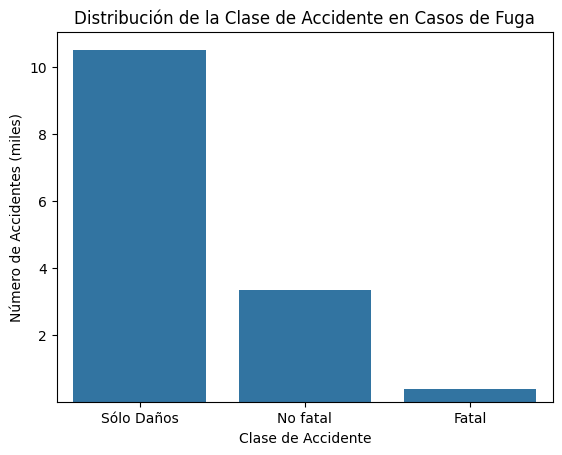

In [25]:
ax = sns.countplot(x='CLASACC', data=fugados_simplificado, order=fugados_simplificado['CLASACC'].value_counts().index)
plt.title('Distribución de la Clase de Accidente en Casos de Fuga')
plt.ylabel('Número de Accidentes (miles)')
ax.set_yticklabels(['2','4','6','8','10'])
ax.set_yticks([2000,4000,6000,8000,10000])
plt.xlabel('Clase de Accidente')
plt.show()

C:\Users\Jesus\AppData\Local\Temp\ipykernel_4280\4107875207.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(meses_abreviados)


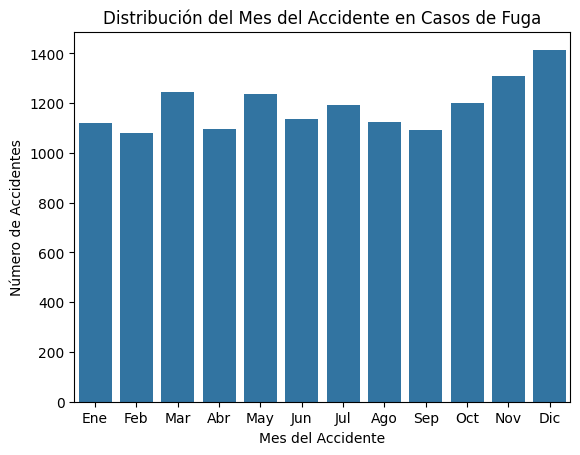

In [26]:
meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
meses_abreviados = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
orden = pd.unique(
    pd.Series(
        pd.Categorical(list(fugados['MES']), categories=list(meses), ordered=True) ) )
ax = sns.countplot(x='MES', data=fugados, order=orden)
plt.title('Distribución del Mes del Accidente en Casos de Fuga')
plt.ylabel('Número de Accidentes')
ax.set_xticklabels(meses_abreviados)
ax.set_xticks(meses)
plt.xlabel('Mes del Accidente')
plt.show()

Se aprecia que el mes con mayor número de accidentes es **diciembre**.

Inspeccionemos diciembre con mayor detalle:

In [27]:
fugados_dic = fugados[fugados['MES']=='Diciembre']

C:\Users\Jesus\AppData\Local\Temp\ipykernel_4280\3078596149.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=315)


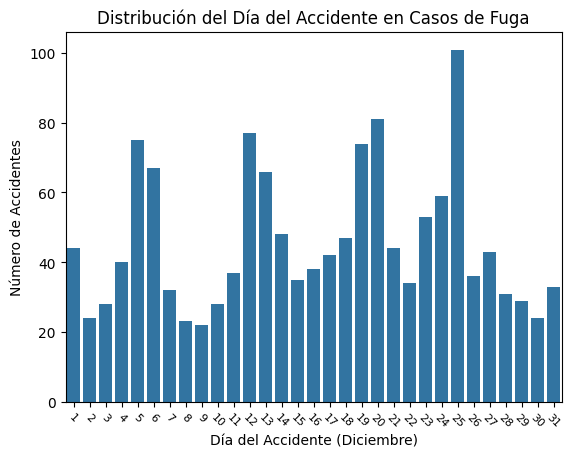

In [28]:
ax = sns.countplot(x='ID_DIA', data=fugados_dic)
plt.title('Distribución del Día del Accidente en Casos de Fuga')
plt.ylabel('Número de Accidentes')
ax.tick_params(axis='x', labelsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=315)
plt.xlabel('Día del Accidente (Diciembre)')
plt.show()

Se observa que el pico de accidentes de tráfico se da el **día 25 de diciembre**. Aproximadamente equivalente a 5 veces más accidentes que el día más tranquilo.